# Decision Tree

Last edited: 4/15/2020 2pm Notes: 

add upsampled data from feature engineering (has library not in anaconda - create new evironment in anaconda navigator, add libraries there, from terminal activate environment, then pip install new upsampling library. have to activate environment every time you open a python notebook; use code in sarah's feature engineering)
conda activate 'name of environment"
turn report into pretty graph
include summary of what algorithm we're using, what it does, what its strengths and weaknesses are, how we think our data will behave, and what hyperparameters we're trying to optimize 


In [7]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import math

import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter("ignore")
import time

%matplotlib inline

In [2]:
#Load cleaned data set 
from utils import intake_data
data = intake_data()
#adjust variables
data.rename(columns = {'death = 1 ': 'death'}, inplace=True)
#create X and Y dataframes
data_X = data.iloc[:, :16]
data_Y = data.iloc[:, 17] #df with class labels
print(data_Y.head())
data_X.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: death, dtype: float64


,age,sex,Alb,PLT,WBC,CRP,APACHE II,SOFA,McCabe,PaO2/FiO2,LDH,CT score,PEEP,PIP,TV,DARDS = 1
0,79.0,0,2.3,10.8,4000.0,17.8,24.0,8.0,1.0,108.0,339.0,191.6,24.0,25.948052,428.05036,0.0
1,83.0,0,4.4,13.5,10200.0,8.9,16.0,6.0,1.0,78.0,385.0,213.3,5.0,10.000000,360.00000,0.0
2,70.0,0,2.7,10.8,5300.0,25.3,22.0,7.0,1.0,70.9,461.0,221.7,18.0,24.000000,525.00000,0.0
3,61.0,0,3.3,8.8,1800.0,22.2,26.0,7.0,1.0,59.2,227.0,211.6,10.0,24.000000,480.00000,0.0
4,81.0,0,3.1,26.2,10600.0,17.0,19.0,4.0,1.0,83.6,680.0,234.9,5.0,10.000000,625.00000,0.0


The following cell is a nested cross-validation to determine the accuracy of a Decision Tree classifier on the dataset. The hyperparamters max_depth, max_features, min_samples_leaf, and criterion were chosen for this validation. The range of tested hyperparameter values was based on the values chosen in the homeworks, and they were reduced to accomodate the smaller number of records. If, after running the cross-validation with the chosen range of hyperparameter values, the maximum or minimum in the range was chosen, the range would be extended, the cross-validation would be re-run, and the proecess would be repeated until the chosen values consistently fell on the inside of the range. 

In [8]:
# run a nested cross-validation 
dt = DecisionTreeClassifier()
params = {"max_depth":[1,2,3,4,5,6], "max_features":[2,4,6,8,10,12,14,16,18,20], 
          "min_samples_leaf":[2,4,6,8,10,12,14,16,18,20,22,24], "criterion":['gini', 'entropy']} 
clf_grid_pipe = sk.model_selection.GridSearchCV(dt, param_grid = params, scoring = "accuracy", cv = 10)
clf_grid_pipe.fit(data_X, data_Y)
print('Best score:', round(clf_grid_pipe.best_score_, 4))
print('Best parameters:\n',
      'max depth:', clf_grid_pipe.best_params_['max_depth'],
      '; max features:', clf_grid_pipe.best_params_['max_features'],
      '; min samples leaf:', clf_grid_pipe.best_params_['min_samples_leaf'], 
      '; criterion:', clf_grid_pipe.best_params_['criterion'])

pred_Y = sk.model_selection.cross_val_predict(clf_grid_pipe, data_X, data_Y, cv = 10)
print('Accuracy: '+ str(round(accuracy_score(data_Y, pred_Y), 2)*100) + '%')


Best score: 0.731
Best parameters:
 max depth: 2 ; max features: 14 ; min samples leaf: 20 ; criterion: entropy
Accuracy: 60.0%


Training Set Records: 177
Testing Set Records: 20
[Text(167.4, 181.2, 'X[11] <= 210.75\nentropy = 0.934\nsamples = 197\nvalue = [128, 69]'), Text(83.7, 108.72, 'X[4] <= 4550.0\nentropy = 0.695\nsamples = 91\nvalue = [74, 17]'), Text(41.85, 36.23999999999998, 'entropy = 0.981\nsamples = 31\nvalue = [18, 13]'), Text(125.55000000000001, 36.23999999999998, 'entropy = 0.353\nsamples = 60\nvalue = [56, 4]'), Text(251.10000000000002, 108.72, 'X[15] <= 0.5\nentropy = 1.0\nsamples = 106\nvalue = [54, 52]'), Text(209.25, 36.23999999999998, 'entropy = 0.984\nsamples = 82\nvalue = [35, 47]'), Text(292.95, 36.23999999999998, 'entropy = 0.738\nsamples = 24\nvalue = [19, 5]')]


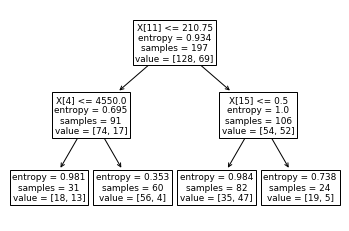

In [10]:
# option 1: split into test and train
x_train, x_test, y_train, y_test = train_test_split(data_X, data_Y, test_size = .1)
print("Training Set Records:", len(x_train))
print("Testing Set Records:", len(x_test))


# option 2 = run it on all data
clf = DecisionTreeClassifier(criterion = "entropy", 
                            max_depth = 2, 
                            max_features = 14, 
                            min_samples_leaf = 20)
print(tree.plot_tree(clf.fit(data_X, data_Y)))

In [14]:
# generate reports to get f1 score, and the rest of that stuff
from sklearn.metrics import classification_report

print(classification_report(data_Y, pred_Y, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       128
           1       0.41      0.30      0.35        69

    accuracy                           0.60       197
   macro avg       0.54      0.53      0.53       197
weighted avg       0.58      0.60      0.59       197

